In [24]:
import pandas as pd

# Load the NYC Parks Structures dataset
csv_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/NYC_Parks_Structures_20240714.csv"
parks_structures = pd.read_csv(csv_path)

# Display the first few rows and column information
print(parks_structures.columns)
print(parks_structures.head())
print(parks_structures.info())


Index(['Alteration_Year', 'BBL', 'BIN', 'BOROUGH', 'Public Restroom',
       'Construction_Year', 'DESCRIPTION', 'DOITT_ID', 'DOITT_Source',
       'Demolition_Year', 'GISPROPNUM', 'Ground_Elevation', 'Height_Roof',
       'LOCATION', 'MaintBy', 'MaintBySpec', 'OMPPROPID', 'Parks_District',
       'SYSTEM', 'multipolygon', 'Recreation_Center', 'FeatureStatus'],
      dtype='object')
   Alteration_Year           BBL        BIN BOROUGH  Public Restroom  \
0              NaN  1.011110e+08        NaN       M             True   
1              NaN  1.011110e+09  1088623.0       M             True   
2              NaN  3.085901e+09  3397330.0       B            False   
3              NaN  3.085901e+09  3423419.0       B            False   
4              NaN  3.085901e+09  3397327.0       B            False   

   Construction_Year                                    DESCRIPTION  \
0                NaN     Robert Bendheim Playground Public Restroom   
1             1932.0         Central Pa

In [25]:
# Check the unique values in the LOCATION column to understand its format
print(parks_structures['LOCATION'].unique()[:10])  # Show the first 10 unique values


['100th Street and Fifth Ave' 'Heckscher Playground' nan
 'Flatbush Ave., North of Belt Pkwy. interchange'
 'Chester Street, Sutter Avenue' 'DeKalb Avenue, Adelphi Street'
 'West 30 Street at Boardwalk'
 'Boardwalk, Surf, Sea Breeze Avenues, Ocean Parkway'
 'Kissena Boulevard & Maple Avenue'
 'Burke Ave., E. 180 St. bet. Dr. Kazamiroff Blvd., Southern Blvd. and Bronx Park E., Unionport Rd.']


Distribution of Structures by Borough
to Understand the distribution of structures across boroughs helps identify which areas have more or fewer park structures.

In [32]:
import plotly.graph_objects as go

# Plot the distribution of structures by borough
borough_counts = parks_structures['BOROUGH'].value_counts()

# Define a mapping from abbreviations to full names
borough_full_names = {
    'Q': 'Queens',
    'X': 'Bronx',
    'B': 'Brooklyn',
    'M': 'Manhattan',
    'R': 'Staten Island'
}

# Replace abbreviations with full names for better readability
borough_counts.index = borough_counts.index.map(borough_full_names)

fig = go.Figure([go.Bar(
    x=borough_counts.index, 
    y=borough_counts.values,
    marker=dict(color=borough_counts.values, colorscale='Viridis'),
    text=borough_counts.values,
    textposition='auto'
)])

fig.update_layout(
    title='Distribution of Park Structures by Borough',
    xaxis_title='Borough',
    yaxis_title='Count of Park Structures',
    template='plotly_white',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,1)',
    font=dict(size=14, family='Arial, sans-serif', color='black'),
    xaxis=dict(
        tickangle=-45,
        title_text='Borough',
        title_font=dict(size=16, family='Arial, sans-serif', color='black'),
        tickfont=dict(size=12, family='Arial, sans-serif', color='black')
    ),
    yaxis=dict(
        title_text='Count of Park Structures',
        title_font=dict(size=16, family='Arial, sans-serif', color='black'),
        tickfont=dict(size=12, family='Arial, sans-serif', color='black')
    )
)

fig.show()


Top 10 Structure Types
Identifying the types of structures gives insight into the variety of amenities available in NYC parks.

In [56]:
import pandas as pd

# Load the dataset
csv_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/NYC_Parks_Structures_20240714.csv"
parks_structures = pd.read_csv(csv_path)

# Display the first few rows and column information
print(parks_structures.head())
print(parks_structures.columns)


   Alteration_Year           BBL        BIN BOROUGH  Public Restroom  \
0              NaN  1.011110e+08        NaN       M             True   
1              NaN  1.011110e+09  1088623.0       M             True   
2              NaN  3.085901e+09  3397330.0       B            False   
3              NaN  3.085901e+09  3423419.0       B            False   
4              NaN  3.085901e+09  3397327.0       B            False   

   Construction_Year                                    DESCRIPTION  \
0                NaN     Robert Bendheim Playground Public Restroom   
1             1932.0         Central Park-Heckscher Public Restroom   
2             1930.0               Marine Park-Golf Course Building   
3             1930.0                                            NaN   
4             1930.0  Marine Park-NYPD Highway Patrol Precinct No.2   

    DOITT_ID DOITT_Source  Demolition_Year  ... Height_Roof  \
0        NaN          NaN              NaN  ...         NaN   
1    99574.0  

In [59]:
# Example categorization based on the "DESCRIPTION" column
def categorize_structure(description):
    if isinstance(description, str):
        description = description.lower()
        if 'playground' in description:
            return 'Playground'
        elif 'restroom' in description:
            return 'Restroom'
        elif 'sports field' in description or 'baseball' in description:
            return 'Sports Field'
        elif 'picnic' in description:
            return 'Picnic Area'
        elif 'recreation center' in description:
            return 'Recreation Center'
        elif 'shelter' in description or 'pavilion' in description:
            return 'Shelter/Pavilion'
        elif 'garden' in description or 'greenhouse' in description:
            return 'Garden/Greenhouse'
        else:
            return 'Other'
    else:
        return 'Unknown'  # Handle non-string descriptions

# Apply the categorization
parks_structures['Structure_Type'] = parks_structures['DESCRIPTION'].apply(categorize_structure)

# Count the occurrences of each structure type
structure_counts = parks_structures['Structure_Type'].value_counts().head(10)

# Display the top 10 most common structures
print(structure_counts)


Structure_Type
Other                1729
Playground            509
Restroom              257
Unknown               164
Garden/Greenhouse      63
Recreation Center      32
Shelter/Pavilion       26
Picnic Area             5
Name: count, dtype: int64


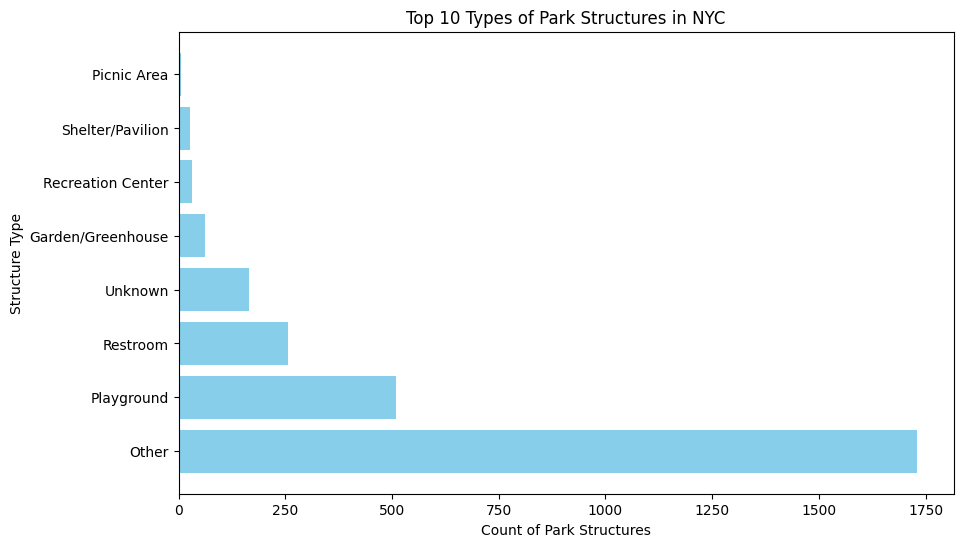

In [60]:
import matplotlib.pyplot as plt

# Plot the distribution of the top 10 structure types
plt.figure(figsize=(10, 6))
plt.barh(structure_counts.index, structure_counts.values, color='skyblue')
plt.xlabel('Count of Park Structures')
plt.ylabel('Structure Type')
plt.title('Top 10 Types of Park Structures in NYC')
plt.show()


Structure Status
Understanding the status of park structures (active, inactive, etc.) helps in assessing the current usability of park facilities.

Horizontal Bar Chart: Makes the comparison of structure statuses easier to read.


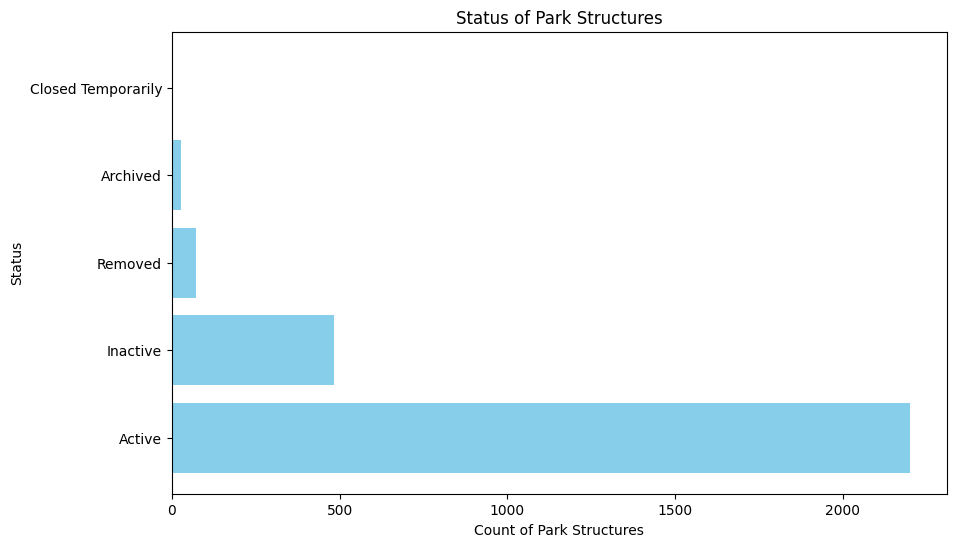

In [34]:
# Plot the status of structures
status_counts = parks_structures['FeatureStatus'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(status_counts.index, status_counts.values, color='skyblue')
plt.xlabel('Count of Park Structures')
plt.ylabel('Status')
plt.title('Status of Park Structures')
plt.show()


Age Distribution: Analyzing the construction year of structures helps understand the age and historical development of park infrastructure.

histogram shows the distribution of construction years more clearly and is easier to understand.

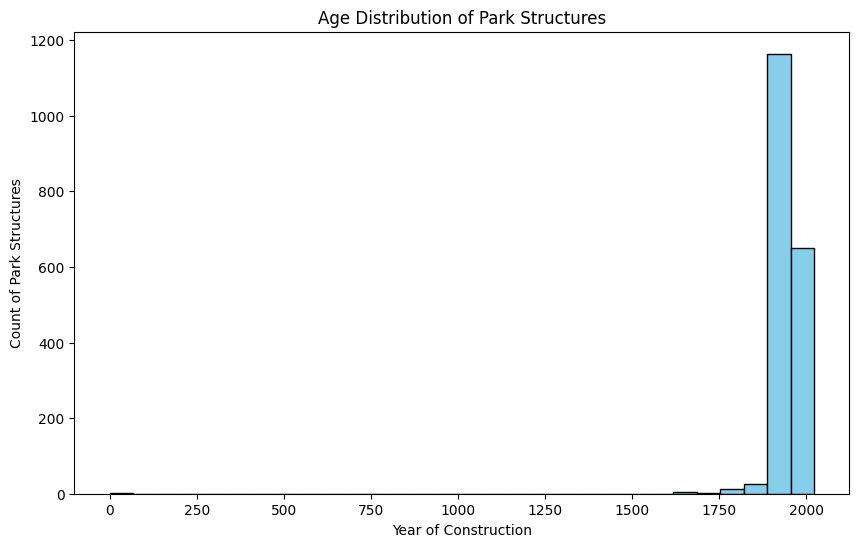

In [38]:
import matplotlib.pyplot as plt

# Plot the distribution of construction years
plt.figure(figsize=(10, 6))
plt.hist(parks_structures['Construction_Year'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Year of Construction')
plt.ylabel('Count of Park Structures')
plt.title('Age Distribution of Park Structures')
plt.show()



Public Restrooms Distribution
Analyzing the availability of public restrooms across boroughs helps understand the accessibility of essential facilities.
Violin plot: 
Shows the distribution and density of public restrooms across boroughs.

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_17554/17658191.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bx/181bxq0d12bbcfv1yn59kb5m0000gn/T/ipykernel_17554/17658191.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




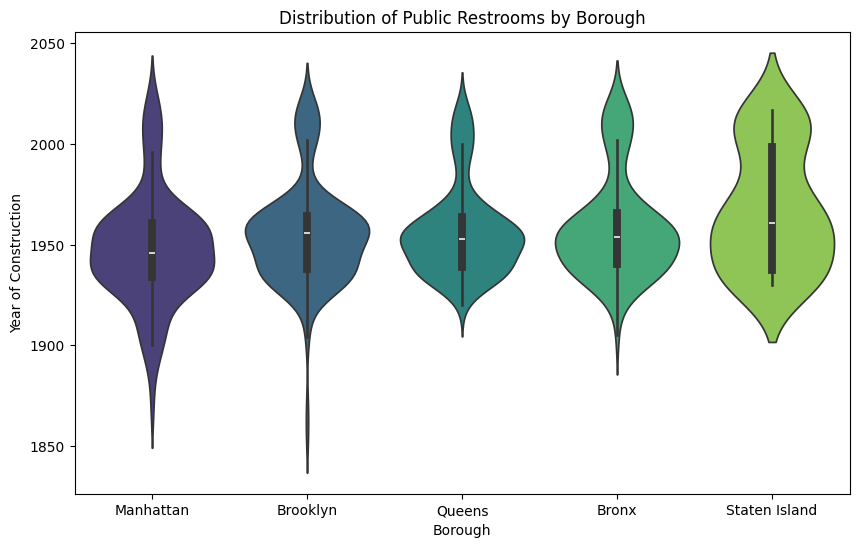

In [37]:
import seaborn as sns

# Prepare data for violin plot
restrooms = parks_structures[parks_structures['Public Restroom'] == True]
restrooms['BOROUGH'] = restrooms['BOROUGH'].map(borough_full_names)

plt.figure(figsize=(10, 6))
sns.violinplot(x='BOROUGH', y='Construction_Year', data=restrooms, palette='viridis')
plt.xlabel('Borough')
plt.ylabel('Year of Construction')
plt.title('Distribution of Public Restrooms by Borough')
plt.show()


In [62]:
import re
from shapely import wkt
from shapely.geometry import MultiPolygon

# Function to extract the centroid of the multipolygon
def extract_centroid(multipolygon_str):
    if isinstance(multipolygon_str, str):
        # Use regular expressions to find coordinates
        multipolygon = wkt.loads(multipolygon_str)
        if isinstance(multipolygon, MultiPolygon):
            centroid = multipolygon.centroid
            return centroid.y, centroid.x
    return None, None

# Apply the function to extract latitude and longitude
parks_structures['latitude'], parks_structures['longitude'] = zip(*parks_structures['multipolygon'].apply(extract_centroid))

# Drop rows with missing coordinates
parks_structures = parks_structures.dropna(subset=['latitude', 'longitude'])

# Display the first few rows to confirm the changes
print(parks_structures[['latitude', 'longitude', 'multipolygon']].head())


    latitude  longitude                                       multipolygon
0  40.790388 -73.954564  MULTIPOLYGON (((-73.95455880005494 40.79041227...
1  40.768362 -73.977097  MULTIPOLYGON (((-73.97708591762525 40.76847243...
2  40.599757 -73.913466  MULTIPOLYGON (((-73.91352714395262 40.59988257...
3  40.598330 -73.911188  MULTIPOLYGON (((-73.91105590786867 40.59832576...
4  40.599318 -73.911915  MULTIPOLYGON (((-73.91203636155555 40.59907337...


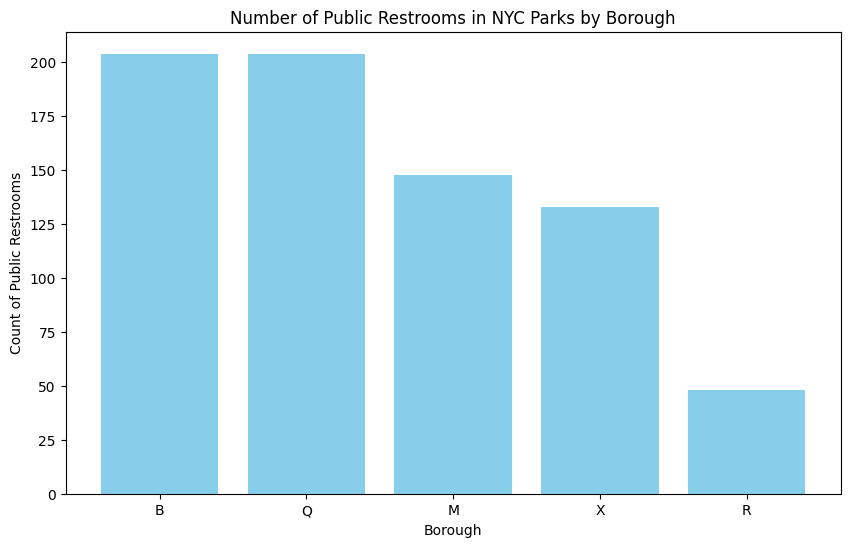

In [63]:
import matplotlib.pyplot as plt

# Filter for public restrooms
restrooms = parks_structures[parks_structures['Public Restroom'] == True]

# Count the number of public restrooms in each borough
restroom_counts = restrooms['BOROUGH'].value_counts()

# Plot the distribution of public restrooms by borough
plt.figure(figsize=(10, 6))
plt.bar(restroom_counts.index, restroom_counts.values, color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Count of Public Restrooms')
plt.title('Number of Public Restrooms in NYC Parks by Borough')
plt.show()


Heatmap to visualize the density of park structures in NYC
visualization of park structure density across NYC, overlaid with the actual locations of the structures.

In [64]:
import folium
from folium.plugins import HeatMap

# Ensure latitude and longitude columns are numeric
parks_structures['latitude'] = pd.to_numeric(parks_structures['latitude'], errors='coerce')
parks_structures['longitude'] = pd.to_numeric(parks_structures['longitude'], errors='coerce')

# Drop rows with missing coordinates
parks_structures = parks_structures.dropna(subset=['latitude', 'longitude'])

# Create a base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Extract data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in parks_structures.iterrows()]

# Add heatmap to the map
HeatMap(heat_data, radius=10).add_to(m)

# Add points to the map
for idx, row in parks_structures.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save the map as an HTML file
m.save("nyc_parks_heatmap.html")

# Display the map
m


Heatmap for Public Restrooms:
the density and distribution of public restrooms in NYC parks, helping to understand where these essential facilities are located and where there might be gaps.

In [65]:
import folium
from folium.plugins import HeatMap

# Filter for public restrooms
restrooms = parks_structures[parks_structures['Public Restroom'] == True]

# Create a base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Extract data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in restrooms.iterrows()]

# Add heatmap to the map
HeatMap(heat_data, radius=10).add_to(m)

# Save the map as an HTML file
m.save("nyc_parks_restrooms_heatmap.html")

# Display the map
m


In [67]:
import pandas as pd
from shapely import wkt
from shapely.geometry import MultiPolygon

# Load the dataset
csv_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/NYC_Parks_Structures_20240714.csv"
parks_structures = pd.read_csv(csv_path)

# Function to extract the centroid of the multipolygon
def extract_centroid(multipolygon_str):
    if isinstance(multipolygon_str, str):
        multipolygon = wkt.loads(multipolygon_str)
        if isinstance(multipolygon, MultiPolygon):
            centroid = multipolygon.centroid
            return centroid.y, centroid.x
    return None, None

# Apply the function to extract latitude and longitude
parks_structures['latitude'], parks_structures['longitude'] = zip(*parks_structures['multipolygon'].apply(extract_centroid))

# Drop rows with missing coordinates
parks_structures = parks_structures.dropna(subset=['latitude', 'longitude'])

# Filter for public restrooms
restrooms = parks_structures[parks_structures['Public Restroom'] == True]

# Save the entire dataset as HTML
output_html_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/nyc_parks_structures.html"
parks_structures.to_html(output_html_path, index=False)

# Save the entire dataset as JSON
output_json_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/nyc_parks_structures.json"
parks_structures.to_json(output_json_path, orient='records', lines=True)

# Save the filtered dataset (public restrooms) as HTML
output_html_restrooms_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/nyc_parks_restrooms.html"
restrooms.to_html(output_html_restrooms_path, index=False)

# Save the filtered dataset (public restrooms) as JSON
output_json_restrooms_path = "/Users/panyanusjansomwong/Desktop/cdp_summer2024/cdp-mapping-systems/Data/nyc_parks_restrooms.json"
restrooms.to_json(output_json_restrooms_path, orient='records', lines=True)
